In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from prettytable import PrettyTable
from scipy import optimize

In [5]:
T,U=np.loadtxt('tv5_messwerte.txt').T
raumtemp=25.8
dT=np.sqrt((T+273.15)**6+((raumtemp+273.15)**3*1.0774)**2)
T=(T+273.15)**4-(raumtemp+273.15)**4
U=U*20
dU=np.ones(U.size)*0.1

table = PrettyTable()
table.add_column('delta((T^4)-(T_0^4)) in K',dT)
table.add_column('(T^4)-(T_0^4) in K',T)
table.add_column('delta(U) in mV',dU)
table.add_column('U in mV',U)
print(table)

+---------------------------+--------------------+----------------+----------------------+
| delta((T^4)-(T_0^4)) in K | (T^4)-(T_0^4) in K | delta(U) in mV |       U in mV        |
+---------------------------+--------------------+----------------+----------------------+
|     243685185.44275823    | 142802061704.96048 |      0.1       |         -6.0         |
|     221299999.06236288    | 124355913750.49048 |      0.1       |        -5.18         |
|     190468037.89568597    | 99925662121.28548  |      0.1       |        -4.22         |
|     162800763.14111775    | 79044840455.08049  |      0.1       | -3.3600000000000003  |
|     138156211.1372771     | 61351767551.87549  |      0.1       |        -2.58         |
|     116399059.43854791    | 46504202211.67049  |      0.1       |        -1.98         |
|     103435452.82372586    | 38026454853.20049  |      0.1       |        -1.18         |
|      86214547.0679759     | 27213666117.99549  |      0.1       | -1.1600000000000001  |

In [6]:
m,b = optimize.curve_fit(lambda T,m,b:m*T+b,T,U)[0]
f=lambda T:m*T+b

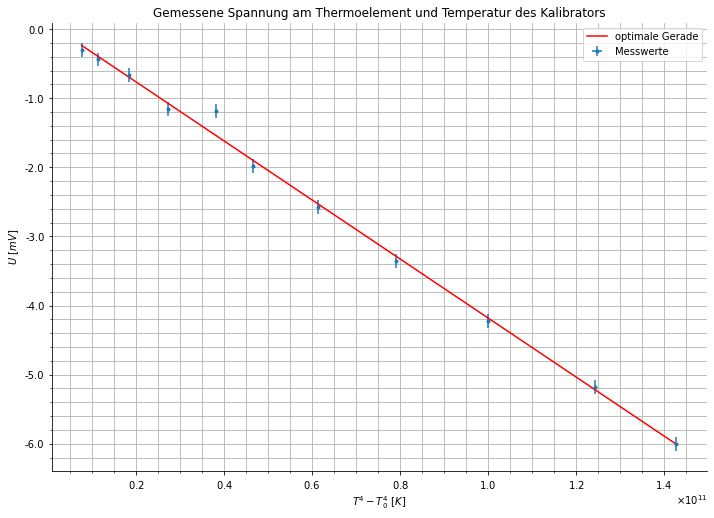

In [9]:
fig = plt.figure(figsize=(11.75,8.25))
ax = plt.axes()
ax.ticklabel_format(useMathText=True)
ax.errorbar(T,U,xerr=dT,yerr=dU,fmt='.',label='Messwerte')
ax.plot(T,f(T),label='optimale Gerade',color='r')
ax.minorticks_on()
ax.set_xlabel('$T^4-T_0^4\ [K]$')
ax.set_ylabel('$U\ [mV]$')
ax.set_title('Gemessene Spannung am Thermoelement und Temperatur des Kalibrators')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.legend()
ax.grid(True,which='both')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

